In [1]:
print('Hello World')


Hello World


In [12]:
import numpy as np

A = np.arange(9)
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [15]:
A = A.reshape(3,3)
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [16]:
B = np.array([1., 0., 0., 0., 1., 0., 0., 0., 1.]).reshape(3,3)
B

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [17]:
C = A * B
C

array([[0., 0., 0.],
       [0., 4., 0.],
       [0., 0., 8.]])

In [18]:
C = A @ B
C

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

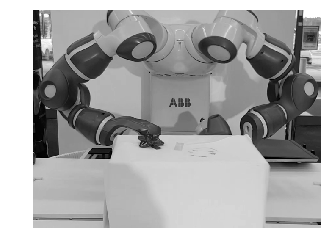

array([[0.0928451 , 0.09507725, 0.09143843, ..., 1.        , 1.        ,
        1.        ],
       [0.09704941, 0.10263765, 0.09143843, ..., 1.        , 1.        ,
        1.        ],
       [0.09816549, 0.10375373, 0.0928451 , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.75261451, 0.75261451, 0.75261451, ..., 0.75596275, 0.75596275,
        0.75596275],
       [0.75261451, 0.75261451, 0.75261451, ..., 0.75596275, 0.75596275,
        0.75596275],
       [0.75261451, 0.75261451, 0.75261451, ..., 0.75596275, 0.75596275,
        0.75596275]])

In [160]:
from skimage import io, color
import matplotlib.pyplot as plt

img = io.imread('YuMiPackage.png')    
#img = io.imread('backpack-hi.png')    
img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)
#img = 255.0*img
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()
img


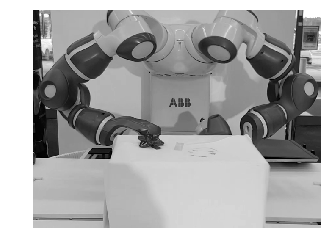

array([[0.0928451 , 0.09507725, 0.09143843, ..., 1.        , 1.        ,
        1.        ],
       [0.09704941, 0.10263765, 0.09143843, ..., 1.        , 1.        ,
        1.        ],
       [0.09816549, 0.10375373, 0.0928451 , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.75261451, 0.75261451, 0.75261451, ..., 0.75596275, 0.75596275,
        0.75596275],
       [0.75261451, 0.75261451, 0.75261451, ..., 0.75596275, 0.75596275,
        0.75596275],
       [0.75261451, 0.75261451, 0.75261451, ..., 0.75596275, 0.75596275,
        0.75596275]])

In [161]:
#img = np.where(img<0.5, 1.0, 0.0)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()
img

In [201]:
kernelsize = 3
padsize = int(np.trunc(kernelsize/2))
padsize


array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [202]:

sharpen = -1*np.ones((kernelsize,kernelsize),int)
sharpen[padsize,padsize]=kernelsize*kernelsize
sharpen = 1/sharpen.size*sharpen
sharpen

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [203]:

identity=np.zeros((kernelsize,kernelsize),int)
identity[padsize,padsize]=1
identity


array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [204]:

edge=-1*np.ones((kernelsize,kernelsize),int)
edge[padsize,padsize]=kernelsize*kernelsize-1
edge= 1/edge.size*edge
edge


array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [205]:

blur=np.ones((kernelsize,kernelsize),int)
blur = 1/blur.size*blur
blur


array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [206]:

img_padded = np.zeros((img.shape[0]+2*padsize, img.shape[1]+2*padsize))
img_padded[padsize:-padsize, padsize:-padsize] = img

img_padded

In [212]:
kernel = edge
flippedK = np.flipud(np.fliplr(kernel))
flippedK


In [213]:

img_convoluted = np.zeros_like(img)    
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img_convoluted[i,j] = (flippedK*img_padded[i:i+kernel.shape[0],j:j+kernel.shape[1]]).sum()


In [214]:
img_convoluted

array([[ 4.97773856e-02,  3.16898911e-02,  3.06051416e-02, ...,
         3.33333333e-01,  3.33333333e-01,  5.55555556e-01],
       [ 3.15462309e-02,  6.49869281e-03, -3.10936819e-04, ...,
        -5.55111512e-17, -5.55111512e-17,  3.33333333e-01],
       [ 3.02984749e-02,  4.84662309e-03, -2.75163399e-04, ...,
        -5.55111512e-17, -5.55111512e-17,  3.33333333e-01],
       ...,
       [ 2.50871503e-01, -2.77555756e-17, -2.77555756e-17, ...,
        -4.16333634e-17, -4.16333634e-17,  2.51987582e-01],
       [ 2.50871503e-01, -2.77555756e-17, -2.77555756e-17, ...,
        -4.16333634e-17, -4.16333634e-17,  2.51987582e-01],
       [ 4.18119172e-01,  2.50871503e-01,  2.50871503e-01, ...,
         2.51987582e-01,  2.51987582e-01,  4.19979303e-01]])

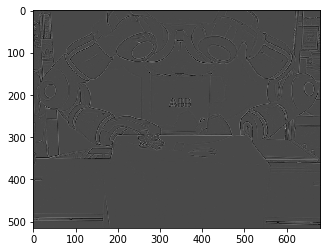

(515, 680)

In [215]:
plt.imshow(img_convoluted, cmap='gray')
#plt.axis('off')
plt.show()
img_convoluted.shape




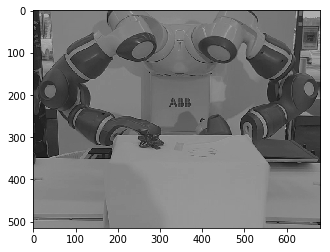

(515, 680)

In [216]:
imgFiltered = img + img_convoluted
plt.imshow(imgFiltered, cmap='gray')
#plt.axis('off')
plt.show()
imgFiltered.shape